In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
np.random.seed(1)

### 1 - Gere dados a partir de uma distribuição de Poisson. Calcula a média e variância e compare seus valores.

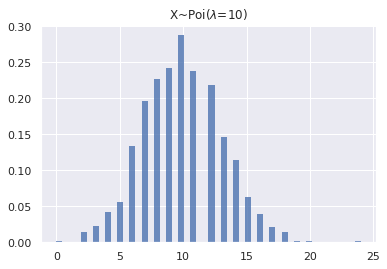

In [2]:
# Gerando Distribuição de Poisson
lam = 10
x = np.random.poisson(lam=lam, size=1000)
plt.hist(x, density=True, bins=50,lw=0,alpha=.8)
plt.title('X~Poi($\lambda$={})'.format(lam))
plt.show()

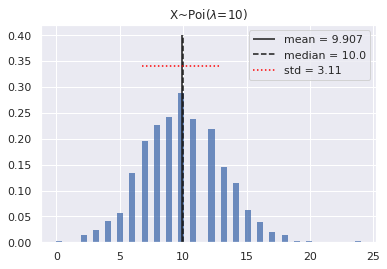

Var = 9.688350999999999
Mean = 9.907


In [3]:
# Obtendo média, mediana e variância
mean = np.mean(x)
median = np.median(x)
var = np.var(x)

plt.vlines(mean,0,0.4, label='mean = {}'.format(mean), color='k')
plt.vlines(median, 0, 0.4, linestyles='dashed', label='median = {}'.format(median), color='k')
plt.hlines(0.34, mean-np.sqrt(var), mean+np.sqrt(var), color='red', linestyles='dotted', label='std = {}'.format(round(np.sqrt(var), 2)))

plt.hist(x, density=True, bins=50,lw=0,alpha=.8)
plt.legend()
plt.title('X~Poi($\lambda$={})'.format(lam))
plt.show(True)
print("Var = {}".format(var))
print("Mean = {}".format(mean))

De fato, para $X \sim Poi(\lambda)$:

$$
Var(X) = E[X] = \lambda
$$

### 2 - Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

In [5]:
# Lendo dados da íris
data = pd.read_csv("data/iris.csv", header=(0))
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [37]:
from scipy.stats import iqr
# Calculando médias, variâncias e IQR:
means = dict([[key, np.mean(data[key])] for key in data.columns[:-1]])
var = dict([[key, np.var(data[key])] for key in data.columns[:-1]])
IQR = dict([[key, iqr(data[key])] for key in data.columns[:-1]])

for key in data.columns[:-1]:
    print(f"{key}:\n\t Mean: {means[key]}\n\t Var: {var[key]}\n\t IQR: {IQR[key]}")

sepal_length:
	 Mean: 5.843333333333334
	 Var: 0.6811222222222223
	 IQR: 1.3000000000000007
sepal_width:
	 Mean: 3.0540000000000003
	 Var: 0.18675066666666668
	 IQR: 0.5
petal_length:
	 Mean: 3.758666666666666
	 Var: 3.092424888888889
	 IQR: 3.4999999999999996
petal_width:
	 Mean: 1.1986666666666668
	 Var: 0.5785315555555555
	 IQR: 1.5


### 3 - Obtenha o boxplot de todas as variáveis da flor Iris.

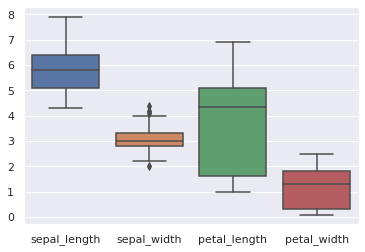

In [137]:
# Plotando o boxplot usando seaborn:
sns.boxplot(data=data)
plt.show()

### 4 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

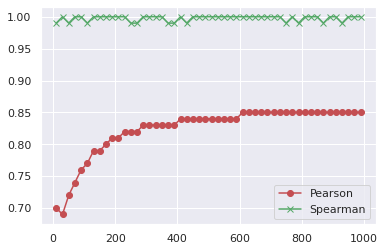

In [111]:
from scipy.stats import pearsonr, spearmanr

# Variaremos N para determinar o comportamente das correlações
pearson_vec = []
spearmanr_vec = []
for N in range(10, 1000, 20):
    x = np.linspace(1, 10000, N) 
    y = np.log(x)

    corr, p_value = pearsonr(x, y)
    corrs, p_values = spearmanr(x, y)
    corr = int(corr*100)/100
    corrs = int(corrs*100)/100
    
    pearson_vec.append(corr)
    spearmanr_vec.append(corrs)
    
x = np.arange(10, 1000, 20)
plt.plot(x, pearson_vec, 'o-r', label='Pearson')
plt.plot(x, spearmanr_vec, 'x-g', label='Spearman')
plt.legend()
plt.show()

### 5 - Considere o código que mostra como a correlação de Pearson muda com a inclusão de ruídos. Modifique a função para $Y = 0.5*X +$ ruído. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos scatterplots.

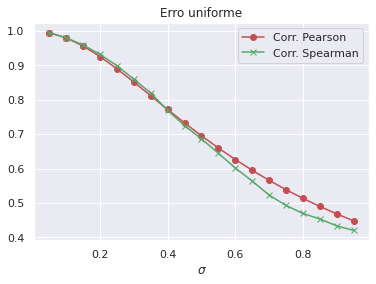

In [122]:
# Trabalharemos com um número constante de pontos
N = 100
X = np.linspace(-1,1, N) # gera N valores em [-1,1]

# Gerando o ruído com um erro uniforme e variando a escala (sigma)
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.

pearson_vec = []
spearmanr_vec = []
for i in range(1, 20):
    sigma = i/20
    ruido = erro*sigma
    Y = 0.5*X + ruido
    
    corr, p_value = pearsonr(X, Y)
    corrs, p_values = spearmanr(X, Y)
    
    pearson_vec.append(corr)
    spearmanr_vec.append(corrs)
    
x = np.arange(1, 20)
x = x/20
plt.plot(x, pearson_vec, 'o-r', label='Corr. Pearson')
plt.plot(x, spearmanr_vec, 'x-g', label='Corr. Spearman')
plt.xlabel("$\sigma$")
plt.legend()
plt.title("Erro uniforme")
plt.show()

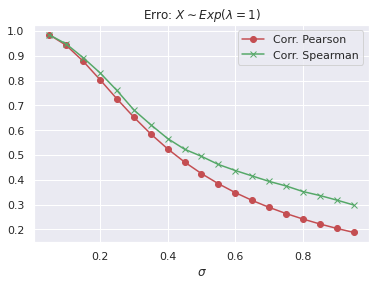

In [133]:
# Podemos tentar também para um erro proveniente de outra distribuição 

# Exponencial:
N = 100
X = np.linspace(-1,1, N) # gera N valores em [-1,1]

# Gerando o ruído com um erro uniforme e variando a escala (sigma)
erro = np.random.exponential(1,N) # ruído a ser incluído na relação linear.

pearson_vec = []
spearmanr_vec = []
for i in range(1, 20):
    sigma = i/20
    ruido = erro*sigma
    Y = 0.5*X + ruido
    
    corr, p_value = pearsonr(X, Y)
    corrs, p_values = spearmanr(X, Y)
    
    pearson_vec.append(corr)
    spearmanr_vec.append(corrs)
    
x = np.arange(1, 20)
x = x/20
plt.plot(x, pearson_vec, 'o-r', label='Corr. Pearson')
plt.plot(x, spearmanr_vec, 'x-g', label='Corr. Spearman')
plt.xlabel("$\sigma$")
plt.legend()
plt.title("Erro: $X \sim Exp(\lambda = 1)$")
plt.show()

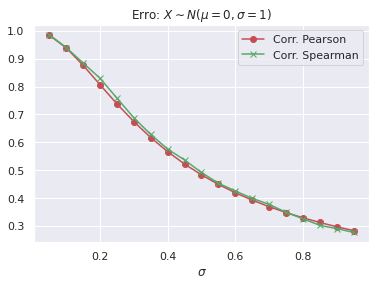

In [135]:
# Normal:
N = 100
X = np.linspace(-1,1, N) # gera N valores em [-1,1]

# Gerando o ruído com um erro uniforme e variando a escala (sigma)
erro = np.random.normal(loc=0, scale=1, size=N) # ruído a ser incluído na relação linear.

pearson_vec = []
spearmanr_vec = []
for i in range(1, 20):
    sigma = i/20
    ruido = erro*sigma
    Y = 0.5*X + ruido
    
    corr, p_value = pearsonr(X, Y)
    corrs, p_values = spearmanr(X, Y)
    
    pearson_vec.append(corr)
    spearmanr_vec.append(corrs)
    
x = np.arange(1, 20)
x = x/20
plt.plot(x, pearson_vec, 'o-r', label='Corr. Pearson')
plt.plot(x, spearmanr_vec, 'x-g', label='Corr. Spearman')
plt.xlabel("$\sigma$")
plt.legend()
plt.title("Erro: $X \sim N(\mu = 0, \sigma = 1)$")
plt.show()